In [4]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score, classification_report, mean_squared_error
import numpy as np

### Data load and Encoder


In [5]:
# Load Titanic Dataset
url_titanic = "https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv"
df_titanic = pd.read_csv(url_titanic)

df_titanic = df_titanic[['Pclass', 'Sex', 'Age', 'Fare', 'Survived']].dropna()
df_titanic['Sex'] = LabelEncoder().fit_transform(df_titanic['Sex'])
X_titanic = df_titanic.drop(columns=['Survived'])
y_titanic = df_titanic['Survived']


### Feature Scaler and Selection


In [6]:

scaler = StandardScaler()
X_titanic = scaler.fit_transform(X_titanic)
pca = PCA(n_components=2)
X_titanic_pca = pca.fit_transform(X_titanic)



### Model Evaluation and Prediction


Accuracy: 0.7342657342657343

Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.74      0.77        87
           1       0.64      0.73      0.68        56

    accuracy                           0.73       143
   macro avg       0.73      0.73      0.73       143
weighted avg       0.74      0.73      0.74       143



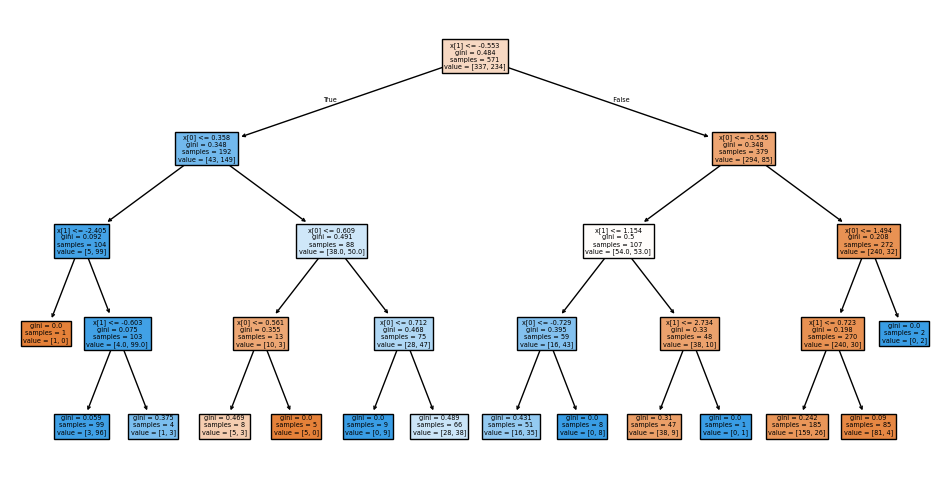

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X_titanic_pca, y_titanic, test_size=0.2, random_state=42)
dt = DecisionTreeClassifier(max_depth=4, random_state=42)
dt.fit(X_train, y_train)

y_pred = dt.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

plt.figure(figsize=(12, 6))
plot_tree(dt, filled=True)
plt.show()